# Pytorch WorkFlow

#### What we are Covering

1. Data Prepare and Load
2. Build model
3. Fitting the model to data (Training)
4. Making Predictions and evaluating a model (inference)
5. Save and Reload a model
6. Putting it all together


In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## 1. Data Prepare and Load

Data can be anything in MAchine LEarning

1.   excel SPreadsheet
2.   Images of any kind
3.   Videos (YouTube has lots of data ...)
4. Audio like songs or podcasts
5. DNA
6. Texts

MAchine LEarning is a game of two parts
1. Get Data in to a numerical representations
2. Build a model to learn patters in that numerical representation,

To showcase this lets create some *Known* data using the linear regression formula.

We will use a linear regression formula to make straight line with *Known* Parameters

In [28]:
num = torch.randn(size = (2,2,2))
print(num.shape)
num2= num.unsqueeze(dim = 1)
print(num2.shape)

torch.Size([2, 2, 2])
torch.Size([2, 1, 2, 2])


In [14]:
# revision
tensor = torch.rand(1)
print(tensor)
tensor2 = torch.randn(1)
print(tensor2)
print(tensor2.dtype)

range_tensor = torch.arange(0,11,2)
print(range_tensor)
print(range_tensor.dtype)
for i in range(len(range_tensor)):
  print(range_tensor[i])


chnged = range_tensor.type(torch.float32)
print(chnged.dtype)


tensor([0.8779])
tensor([-0.8571])
torch.float32
tensor([ 0,  2,  4,  6,  8, 10])
torch.int64
tensor(0)
tensor(2)
tensor(4)
tensor(6)
tensor(8)
tensor(10)
torch.float32


In [29]:
1 # Create Known Parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
steps = 0.02

X = torch.arange(start, end, steps)
X_rs= torch.reshape(X, shape = (len(X), 1))
print(X_rs)
print(X_rs.shape)
Y_ = weight*X_rs + bias
# Adding  some noise
noise =  torch.randn_like(Y_) *.1
Y= Y_ + noise
#print(Y)

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
torch.Size([50, 1])


In [30]:
len(X), len(Y)

(50, 50)

### Spliting Data in Training and Split

In [31]:
# xreate a train test split

train_split =int(0.8*len(X)) # used as an index
print(train_split)
x_train, y_train = X_rs[:train_split], Y[:train_split]  # First 80% for training
x_test, y_test = X_rs[train_split:], Y[train_split:]    # Last 20% for testing

print("Train size:", len(x_train), len(y_train))
print("Test size:", len(x_test), len(y_test))

40
Train size: 40 40
Test size: 10 10


#### Building a function to visualize the data
Visualzie, visualize


In [32]:
def plot_prediction(train_data = x_train,
                    train_label = y_train,
                    test_data = x_test,
                    test_label = y_test,
                    prediction = None):
  plt.figure(figsize = (10,7))
  #Plot Training data in blue
  plt.scatter(train_data, train_label, c='b', s=4, label = 'Training Data')
  # plot tets data in green
  plt.scatter(test_data, test_label, c = 'g', s= 4, label = 'Test_data')
  if prediction is not None:
    plt.scatter(test_data, prediction, c='r', s= 4, label = 'Prediction')

  plt.legend()

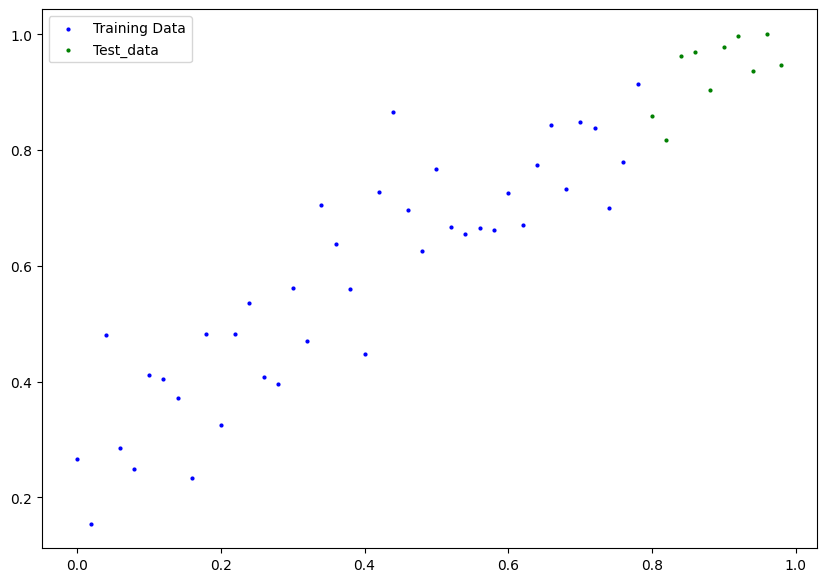

In [ ]:
plot_prediction()

#### Building our first PyTorch Model

In [ ]:
class LinearRegressionModel(nn.Module):# almost everithing in pytorch inherit eith nn.Module
 def __init__(self):
  super().__init__()
  #Define weights and bias as learnable parameters(Model Parameters)
  self.weights =nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float))
  self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype = torch.float))

  # forward
  def forward(self,x ):
    return self.weights * x + self.bias

There are two main algorithms to make the parametrs adjust or lrarning:
1. Gradient Descet
2. Back Propagation

### Pytorch Model Building Esentials:
* torch.nn - Cntains all of the buidings for computational graph(Neural Network)
* nn.Parameters - what parameters should our model try and learn, often a PyTorch LAyer from torch.nn will set these for us.
* torch.nnn.Module - the base class for all NN modules
* torch.optim - this where Optimizers live and have gradient descent
* def forward () - All nn.Module subclasses require you to overwrite forward(), this method define what happens in the forward computation.

In [ ]:
# random seed : these random values are now deterministic.
torch.manual_seed(42)
# Model Parameters (instance of the model)
model_0 = LinearRegressionModel()

print(list(model_0.parameters()))
# Returns a dictionary containing all the parameters
#and their associated names as key-value pairs.
print(model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
